In [15]:
from utils.decomposition import Decomposition
from utils.filtre import Filter
from utils.decomposition import Extraction
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from tqdm import tqdm
from scipy.linalg import sqrtm
from scipy.linalg import expm, logm
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


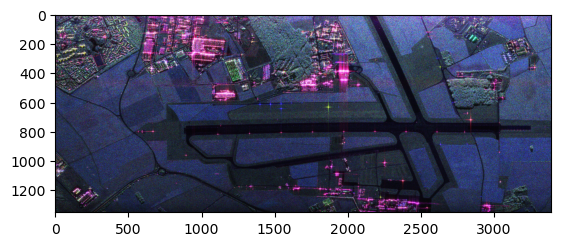

In [16]:
img = np.load('var/bretigny_lee_filter.npy')
cut_img = img[50:450, 50 : 450]
decomp = Decomposition(cut_img, pauli=False)

plt.imshow(abs(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


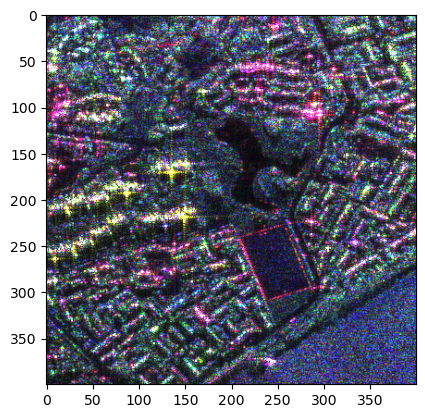

In [3]:
plt.imshow(abs(cut_img))

In [ ]:
decomp.compute_coh_array((6,6))

In [17]:
coh = np.load('var/cut_img_(50,50,400).npy')

In [9]:
decomp.data['coh'] = coh

In [10]:
decomp.apply_halpha_decomposition()

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:16<00:00, 24.91it/s]


(array([[0.89852735, 0.89585531, 0.90741058, ..., 0.74707734, 0.75102526,
         0.73796351],
        [0.91042644, 0.91549518, 0.92790122, ..., 0.76603606, 0.76372577,
         0.75468158],
        [0.92715507, 0.9212439 , 0.93244628, ..., 0.78637929, 0.77942632,
         0.76888233],
        ...,
        [0.83505744, 0.83641215, 0.8308432 , ..., 0.8268223 , 0.82657446,
         0.82334484],
        [0.82325456, 0.82628892, 0.8296277 , ..., 0.82800843, 0.83108171,
         0.83243916],
        [0.79578543, 0.79245934, 0.80796611, ..., 0.82527988, 0.82162497,
         0.82934578]]),
 array([[0.40260172, 0.47150877, 0.43354096, ..., 0.42002276, 0.4003141 ,
         0.34977282],
        [0.34775029, 0.38584867, 0.33924833, ..., 0.42334224, 0.42274385,
         0.37485769],
        [0.37095911, 0.40309197, 0.34548758, ..., 0.44859356, 0.45293394,
         0.41790516],
        ...,
        [0.43976537, 0.52119669, 0.50158013, ..., 0.52785808, 0.51729784,
         0.53398361],
        [0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


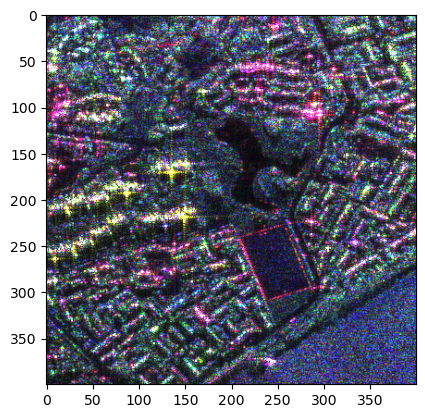

In [6]:
plt.imshow(abs(cut_img))

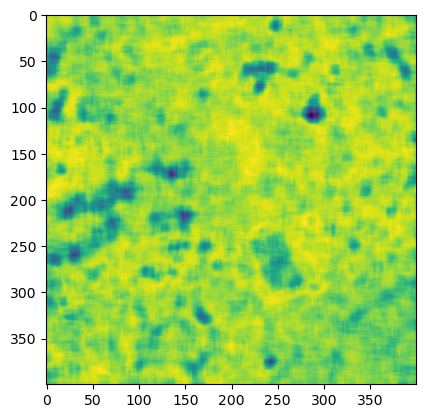

In [6]:
plt.imshow(decomp.data['entropy'])

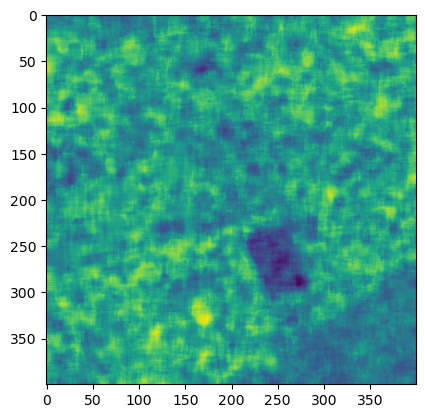

In [7]:
plt.imshow(decomp.data['alpha'])

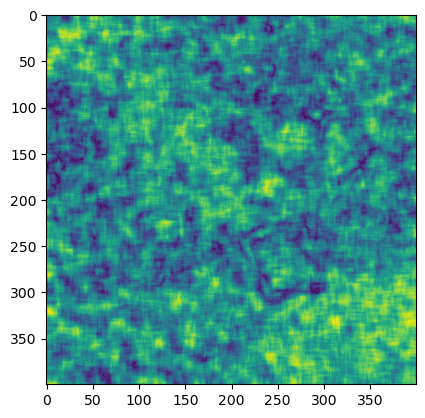

In [8]:
plt.imshow(decomp.data['anisotropy'])

In [9]:
halpha_img = np.zeros_like(cut_img, dtype = np.float32)
for i in range(halpha_img.shape[0]) :
    for j in range(halpha_img.shape[1]) :
        halpha_img[i,j] = np.array([ decomp.data['entropy'][i,j],  decomp.data['alpha'][i,j],  decomp.data['anisotropy'][i,j]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


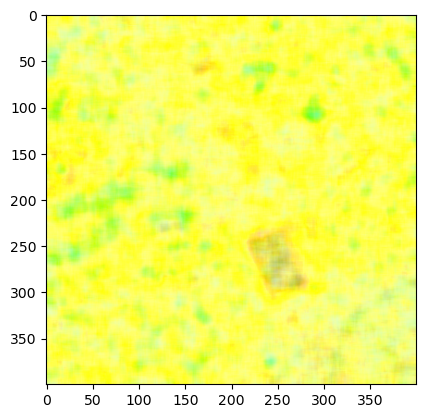

In [10]:
plt.imshow(halpha_img)

In [11]:
decomp_2 = Decomposition(cut_img, pauli=False)

In [12]:
decomp_2.compute_coh_array((3,3))

100%|██████████| 400/400 [13:09<00:00,  1.97s/it]


array([[[[ 0.14216433-2.73251987e-17j, -0.30619054+1.31391857e-01j,
          -0.03055064-1.25890321e-02j],
         [-0.30619054-1.31391857e-01j,  2.39670094-4.64872803e-16j,
          -0.60737975+2.44713500e-02j],
         [-0.03055064+1.25890321e-02j, -0.60737975-2.44713500e-02j,
           0.46113473-3.62200534e-17j]],

        [[ 0.14457814+3.17405683e-17j, -0.18607588+1.62010181e-01j,
          -0.09571532-2.70009225e-02j],
         [-0.18607588-1.62010181e-01j,  2.28977468+7.78844888e-16j,
          -0.72932618+9.63414725e-02j],
         [-0.09571532+2.70009225e-02j, -0.72932618-9.63414725e-02j,
           0.56564718+1.09197271e-16j]],

        [[ 0.20714445+7.51986451e-17j, -0.20033605+1.50583362e-01j,
          -0.14759773-7.39779158e-03j],
         [-0.20033605-1.50583362e-01j,  2.19925913+7.01706702e-16j,
          -0.58229683+9.16866525e-02j],
         [-0.14759773+7.39779158e-03j, -0.58229683-9.16866525e-02j,
           0.59359643+1.71687004e-16j]],

        ...,

        

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:14<00:00, 27.97it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


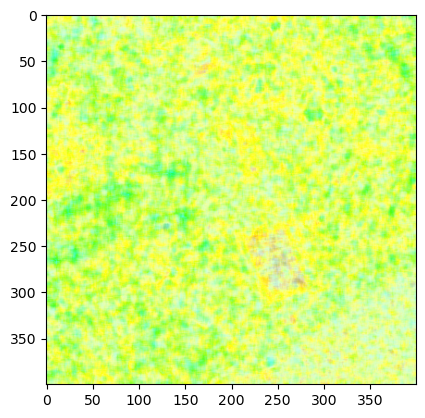

In [13]:
H, A, alpha = decomp_2.apply_halpha_decomposition() 
halpha_img_2 = np.zeros_like(cut_img, dtype = np.float32)
for i in range(halpha_img.shape[0]) :
    for j in range(halpha_img.shape[1]) :
        halpha_img_2[i,j] = np.array([ decomp_2.data['entropy'][i,j],  decomp_2.data['alpha'][i,j],  decomp_2.data['anisotropy'][i,j]])
plt.imshow(halpha_img_2)

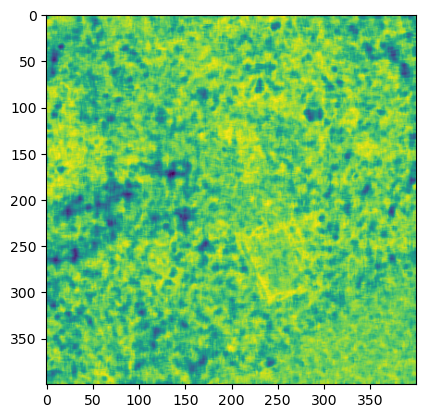

In [14]:
plt.imshow(decomp_2.data['entropy'])

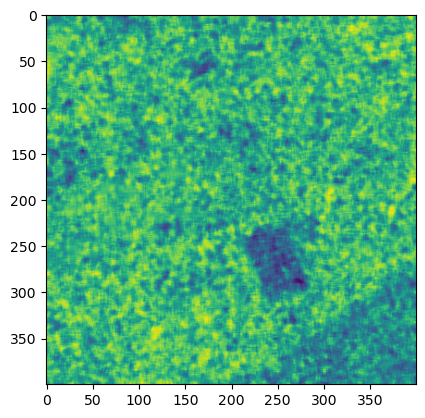

In [15]:
plt.imshow(decomp_2.data['alpha'])

In [18]:
p = []
for i in range(400) :
    for j in range(400) :
        p.append((H[i,j],alpha[i,j]))

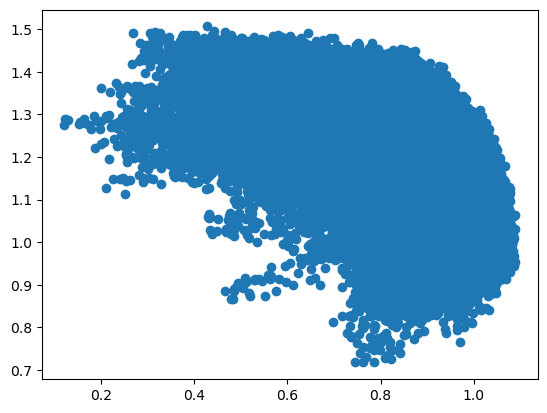

In [18]:
plt.scatter(H.reshape(-1),alpha.reshape(-1))

In [17]:
deoriented = decomp_2.apply_Yamaguchi_deoriented()

/home/gilles/Bureau/StageSegmentationArnaud/code/utils/decomposition.py:454: ComplexWarning: Casting complex values to real discards the imaginary part
  deoriented[i,j] = Ps, Pd, Pv, alpha, beta


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


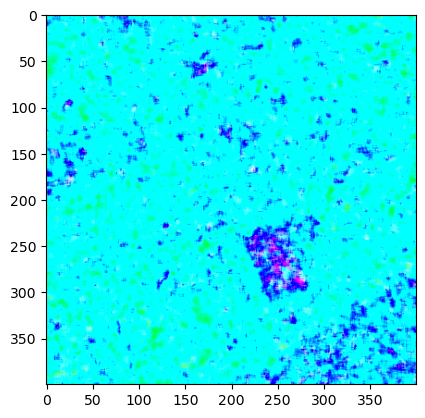

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


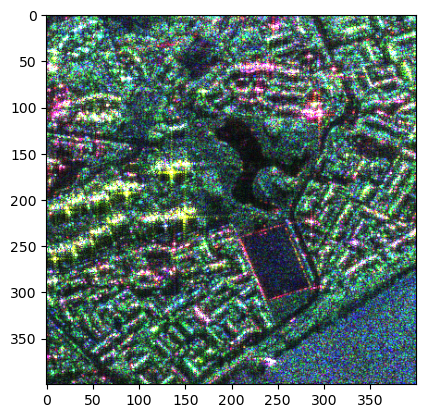

In [24]:
plt.imshow(deoriented[:,:,:3])
plt.show(False)
plt.imshow(abs(cut_img))

In [5]:
coh_gauss_array = decomp.compute_gaussian_coh_array((6,6))


100%|██████████| 400/400 [01:52<00:00,  3.57it/s]


In [6]:
decomp.apply_halpha_decomposition(token = 'gauss')

100%|██████████| 400/400 [00:16<00:00, 24.97it/s]


(array([[0.82442261, 0.83790022, 0.85701268, ..., 0.81537476, 0.81513937,
         0.81723708],
        [0.83470117, 0.85272034, 0.87178187, ..., 0.83099905, 0.82695181,
         0.83356043],
        [0.8520853 , 0.86300855, 0.87607865, ..., 0.83773661, 0.83237579,
         0.83948824],
        ...,
        [0.87955235, 0.87081036, 0.85531344, ..., 0.76422369, 0.77776953,
         0.77673822],
        [0.87090788, 0.86227931, 0.85715041, ..., 0.76616991, 0.78516989,
         0.78559048],
        [0.82112267, 0.81741919, 0.82418368, ..., 0.76593909, 0.77630918,
         0.78108312]]),
 array([[0.31358345, 0.34424355, 0.37154982, ..., 0.52418015, 0.49734035,
         0.45986313],
        [0.26256877, 0.28659046, 0.31386091, ..., 0.49932785, 0.49470787,
         0.46929173],
        [0.27527971, 0.2982583 , 0.30985227, ..., 0.50517459, 0.50328032,
         0.48238342],
        ...,
        [0.36534547, 0.46403897, 0.45262658, ..., 0.33967906, 0.32436964,
         0.34689951],
        [0.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


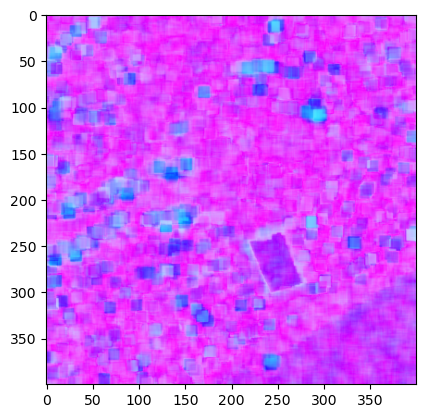

In [7]:
H, A, alpha = decomp.data['entropy'], decomp.data['anisotropy'], decomp.data['alpha']
halpha_img = np.zeros_like(cut_img, dtype = np.float32)
for i in range(halpha_img.shape[0]) :
    for j in range(halpha_img.shape[1]) :
        halpha_img[i,j] = np.array([ H[i,j],  A[i,j],  alpha[i,j]])
plt.imshow(halpha_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


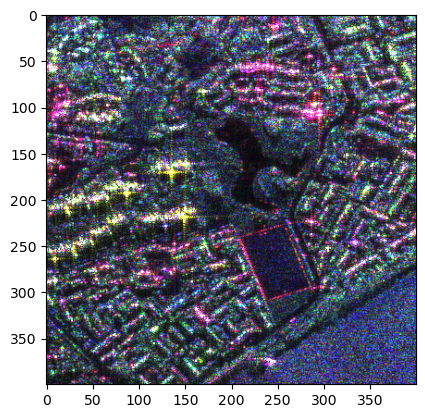

In [8]:
plt.imshow(abs(cut_img))

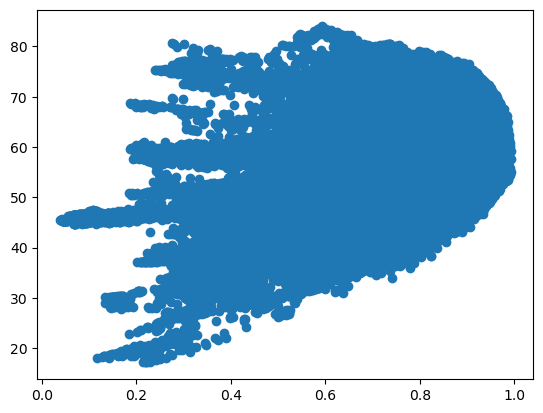

In [9]:
plt.scatter(H.reshape(-1), alpha.reshape(-1))

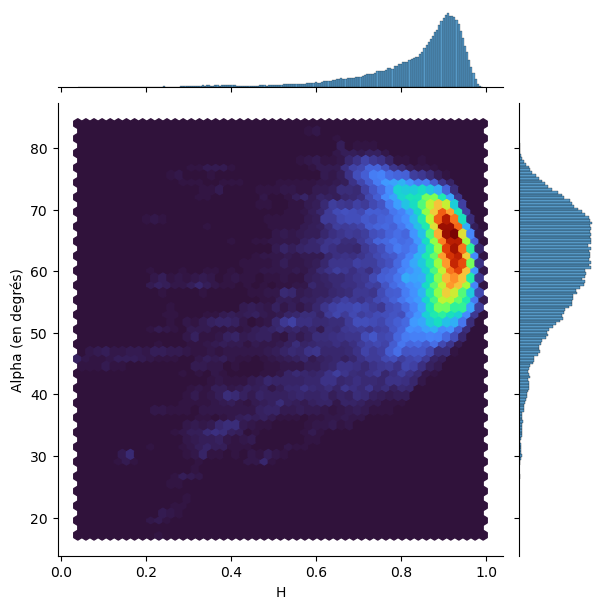

In [10]:


# Créer le plot 2D en hexagones avec seaborn
jointplot = sns.jointplot(x=H.reshape(-1), y=alpha.reshape(-1), kind='hex', cmap='turbo', color='blue', marginal_kws={'color': 'green'})
jointplot.set_axis_labels('H', 'Alpha (en degrés)')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


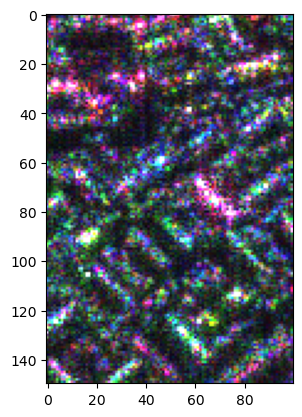

In [6]:
#test avec un découpage zone urbaine unique
zone_urbaine = cut_img[250:400, 100 : 200]
plt.imshow(abs(zone_urbaine))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


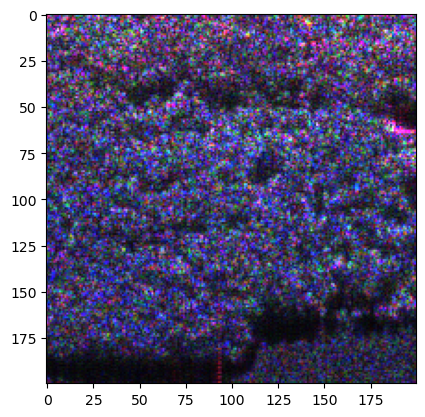

In [10]:
plt.imshow(abs(img[450:650,2750:2950]))

In [11]:
foret = img[450:650,2750:2950]
decomp_urbaine = Decomposition(zone_urbaine, pauli = False)
decomp_foret = Decomposition(foret, pauli = False)

In [12]:
decomp_urbaine.compute_coh_array((3,3))
decomp_foret.compute_coh_array((6,6))

100%|██████████| 200/200 [05:46<00:00,  1.73s/it]


array([[[[ 0.83586747+1.30688563e-17j, -0.0224264 -4.82815167e-02j,
           0.04119524-3.66127045e-01j],
         [-0.0224264 +4.82815167e-02j,  0.88683599+2.13026351e-17j,
          -0.22679048-1.88414142e-01j],
         [ 0.04119524+3.66127045e-01j, -0.22679048+1.88414142e-01j,
           1.27729654+2.07750316e-17j]],

        [[ 0.81090095+3.78032265e-18j, -0.10269295-6.49279853e-02j,
           0.04075987-3.11556866e-01j],
         [-0.10269295+6.49279853e-02j,  0.87896919-7.39073870e-18j,
          -0.15881548-1.07373358e-01j],
         [ 0.04075987+3.11556866e-01j, -0.15881548+1.07373358e-01j,
           1.31012986-1.08913678e-18j]],

        [[ 0.82091824-1.45180854e-17j, -0.05322357-3.84095346e-02j,
          -0.02812475-2.91161880e-01j],
         [-0.05322357+3.84095346e-02j,  0.82364283-1.53040886e-17j,
          -0.0857108 -1.02096329e-01j],
         [-0.02812475+2.91161880e-01j, -0.0857108 +1.02096329e-01j,
           1.35543893-2.75553036e-17j]],

        ...,

        

In [13]:
decomp_img_tot = Decomposition(img, pauli=False)


In [14]:
coh_array = decomp_img_tot.data['coh']
np.save('var/coh_array_lee_filter.npy', coh_array)

In [11]:
coh_array = np.load('var/coh_array_lee_filter.npy')

In [14]:
decomp_img_tot.data['coh'] = coh_array

In [15]:
coh_urbaine = decomp_urbaine.apply_halpha_decomposition()
coh_foret = decomp_foret.apply_halpha_decomposition()


100%|██████████| 200/200 [00:03<00:00, 50.85it/s]


In [18]:
H_urbaine, A_urbaine, alpha_urbaine = decomp_urbaine.data['entropy'], decomp_urbaine.data['anisotropy'], decomp_urbaine.data['alpha']
H_foret, A_foret, alpha_foret = decomp_foret.data['entropy'], decomp_foret.data['anisotropy'], decomp_foret.data['alpha']


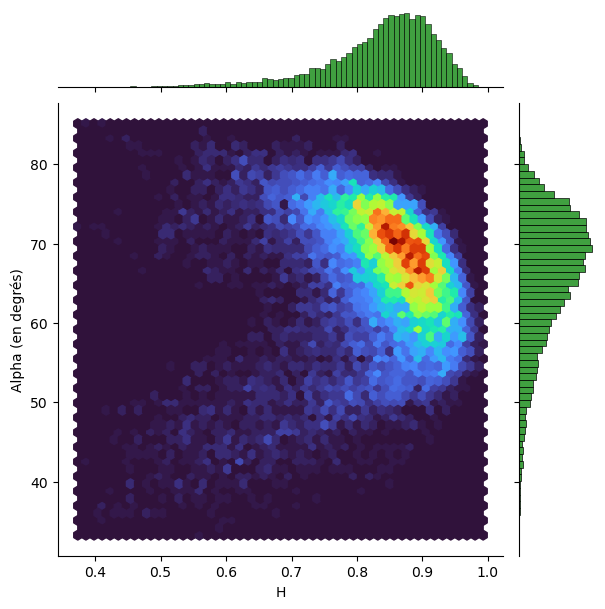

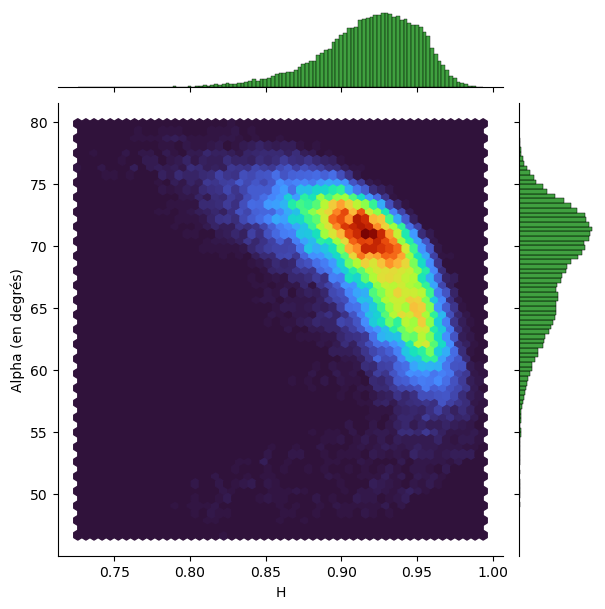

In [22]:


jointplot = sns.jointplot(x=H_urbaine.reshape(-1), y=alpha_urbaine.reshape(-1), kind='hex', cmap='turbo',  marginal_kws={'color': ['blue','green']})
jointplot.set_axis_labels('H', 'Alpha (en degrés)')


jointplot = sns.jointplot(x=H_foret.reshape(-1), y=alpha_foret.reshape(-1), kind='hex', cmap='turbo', marginal_kws={'color': ['blue','green']})
jointplot.set_axis_labels('H', 'Alpha (en degrés)')






In [15]:
decomp_img_tot.apply_halpha_decomposition()

  0%|          | 0/1350 [00:00<?, ?it/s]

100%|██████████| 1350/1350 [07:32<00:00,  2.98it/s]


(array([[0.79967863, 0.85250572, 0.90888133, ..., 0.92754547, 0.91721467,
         0.82631323],
        [0.81833462, 0.80990597, 0.89596434, ..., 0.84562936, 0.854539  ,
         0.78120223],
        [0.89229174, 0.8822934 , 0.91899404, ..., 0.80229914, 0.83803989,
         0.81437966],
        ...,
        [0.75928752, 0.82666865, 0.8499979 , ..., 0.73909139, 0.70846126,
         0.75168047],
        [0.79126583, 0.88117836, 0.88883115, ..., 0.73160527, 0.69489743,
         0.73317536],
        [0.87653361, 0.93989432, 0.92612676, ..., 0.73101773, 0.68609169,
         0.72794766]]),
 array([[0.52492547, 0.52228892, 0.50114034, ..., 0.05810119, 0.11022378,
         0.18614354],
        [0.40574021, 0.4428358 , 0.49446279, ..., 0.20268659, 0.2571274 ,
         0.27892714],
        [0.312952  , 0.39153897, 0.42468945, ..., 0.17864469, 0.23800501,
         0.23653689],
        ...,
        [0.29521767, 0.39864277, 0.43504477, ..., 0.6073926 , 0.62501732,
         0.60125831],
        [0.3

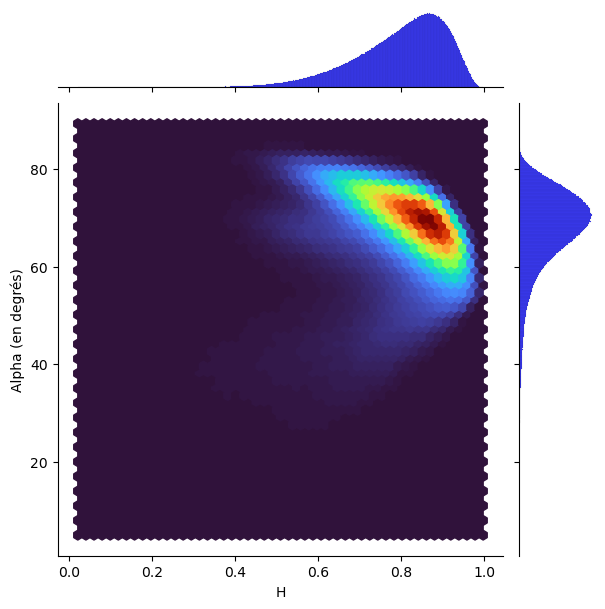

In [17]:
jointplot = sns.jointplot(x=decomp_img_tot.data['entropy'].reshape(-1), y=decomp_img_tot.data['alpha'].reshape(-1), kind = 'hex', cmap='turbo', marginal_kws={'color': 'blue'})
jointplot.set_axis_labels('H', 'Alpha (en degrés)')

In [23]:
height, length, dim = img.shape 
eigen_values = np.zeros((height, length, 3))
for i in tqdm(range(height)) :
    for j in range(length) :
        eigen_values[i,j] = np.linalg.eig(coh_array[i,j])[0]

  0%|          | 0/1350 [00:00<?, ?it/s]

/tmp/ipykernel_7023/3762881096.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  eigen_values[i,j] = np.linalg.eig(coh_array[i,j])[0]
100%|██████████| 1350/1350 [03:38<00:00,  6.18it/s]


<Axes: ylabel='Count'>

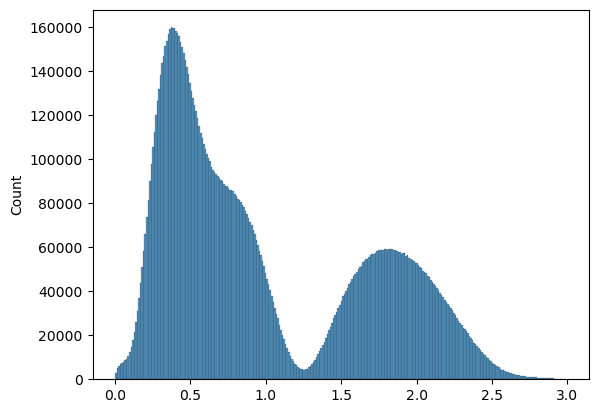

In [24]:
sns.histplot(eigen_values.reshape(-1))

In [23]:
def init_halpha(H,a) :
    height, length = H.shape
    classes = np.zeros((height, length))
        
    for i in range(height) :
        for j in range(length) :
            pos = (i,j)
            h = H[pos]
            alpha = a[pos]
            if h < 0.5 :
                if alpha < 42 :
                    c = 0
                elif alpha < 48 :
                    c = 1
                else :
                    c = 7
            elif h < 0.9 :
                if alpha < 38 :
                    c = 2
                elif alpha < 52 :
                    c = 3
                else :
                    c = 5
            else :
                if alpha < 55 :
                    c = 4
                else :
                    c = 6
            classes[pos]  = c  
    
    return classes 

def module(a) :
    s = 0
    for i in a :
        s += np.real(i)**2 + np.imag(i)**2
    return s

def init_road(img, classes) :
    for i in range(height):
        for j in range(length) :
            if module(img[i,j]) < 0.05 :
                classes[i,j] = np.array([0]*3)
            else :
                classes[i,j] = np.array([1]*3)
    return classes


In [ ]:
predicted = init_halpha(decomp_img_tot.data['entropy'], decomp_img_tot.data['alpha'])


In [44]:
image_01 = init_road(img, np.zeros((height, length,3)))

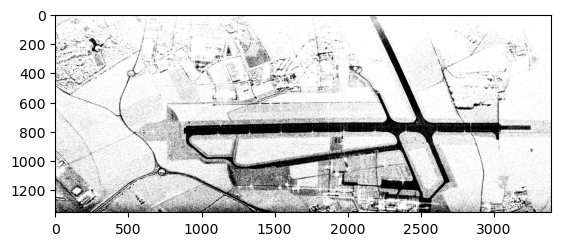

In [46]:
plt.imshow(image_01)

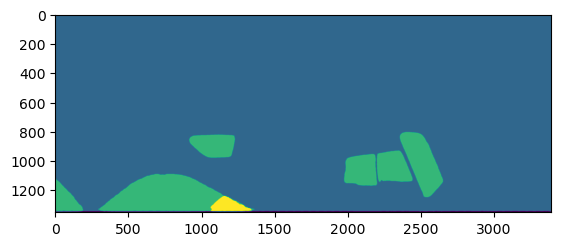

In [57]:
def sam_mask_generator(img) :
    from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
    import cv2
    sam = sam_model_registry["default"](checkpoint="sam_pth/sam_vit_h_4b8939.pth")

    mask_generator = SamAutomaticMaskGenerator(sam)
    int_img = np.uint8(img)
    cv2_image = cv2.cvtColor(int_img, cv2.COLOR_RGB2BGR)
    masks = mask_generator.generate(cv2_image)
    img_mask = np.zeros((height,length))
    for mask in masks :
        img_mask += mask['segmentation']
    return img_mask
plt.imshow( sam_mask_generator(image_01))


In [54]:
def wishart_distance(matrix_a, matrix_b, P_wb, L) :
    """
    Args:\n
        - matrix_a Array represents the estimated cov of a certain pixel\n
        - matrix_b Array represents the centroid of a certain cluster\n
        - P_wb number representing the probability a priori of an element belonging to cluster b\n
        - L is the equivalent number of look\n
    Returns:\n
        - d distance between pixel coherence matrix and the cluster centroid

    """
    det_a = np.linalg.det(matrix_a)  
    d = L * np.log(det_a) + L * np.trace(np.linalg.inv(matrix_a)@matrix_b) 
    return d


def compute_wishart_distances(coh_array, class_centroids, pixels_per_class, L) :

    tot_pix = sum(pixels_per_class)
    height, length, _, _ = coh_array.shape

    c = class_centroids.shape[0]
    print(f'La valeur de c est :{c}')
    distance_matrix = np.zeros((height, length,c))

    for i, row in enumerate(coh_array) :
        for j, val in enumerate(row) :
            for k in range(c) :

                distance_matrix[i,j,k] = wishart_distance(val, class_centroids[k], pixels_per_class[k]/tot_pix, L)
    return distance_matrix

def compute_geometric_distances(coh_array, class_centroids) :
    height, length, _, _ = coh_array.shape
    c = class_centroids.shape
    distance_matrix = np.zeros((height, length,c))
    for i, row in enumerate(coh_array) :
        for j, val in enumerate(row) :
            for k in range(c) :
                distance_matrix[i,j,c] = geometric_distance(val,class_centroids[c])
    return distance_matrix

def geometric_distance(matrix_a, matrix_b) :
    root_a = sqrtm(matrix_a)
    inv_root_a = np.linalg.inv(root_a)
    return sum(np.log(np.conjugate(np.transpose(inv_root_a))@ matrix_b @ root_a))

def frobenius(d) :
    return sum(module(d))

def geometric_mean(matrix_list):
    estimate = np.zeros_like(matrix_list[0], dtype=complex)
    estimate_n = np.eye(estimate.shape[0], dtype = complex)
    count = 0
    eps = 1e-4 #learning_rate
    while frobenius(estimate-estimate_n) > 1e-4 :
        if count > 0 :
            estimate_n = estimate
        s = np.zeros(estimate_n.shape, dtype = complex)
        root_n = sqrtm(estimate_n)
        inv_root_n = np.linalg.inv(root_n)
        for i in range(len(matrix_list)) :
            s += logm(np.conjugate(np.transpose(inv_root_n))@matrix_list[i]@inv_root_n)
        estimate = root_n@expm(-eps * s)@root_n
    return estimate

def arithmetic_mean(matrix_list):
    try :
        return 1/len(matrix_list) * np.sum(matrix_list,axis = 0, dtype= complex)
    except ZeroDivisionError :
        return np.eye(3, dtype= complex)

In [53]:
def assign_centroids(distance_matrix) :
    classes = np.zeros((distance_matrix.shape[0], distance_matrix.shape[1]))
    for i, row in enumerate(distance_matrix) :
        for j, distances in enumerate(row) :
            classes[i,j] = np.argmin(distances)
    return classes

def compute_H_A_alpha(coh_array) :
    height, length, _, _ = coh_array.shape
    entropy = np.zeros((height, length))
    A = np.zeros((height, length))
    alpha = np.zeros((height, length))
    for i in tqdm(range(height)):
        for j in range(length):
            entropy[i, j], A[i, j], alpha[i, j] = H_alpha(coh_array[i, j])
    
    return entropy, A, alpha

def H_alpha(coh) :
    eig_vals, eig_vec = np.linalg.eig(coh)
    eig_vals = np.real(abs(eig_vals)) #eigen values are real since the coherence matrix is hermitian
    trace = sum(eig_vals) #span of the matrix equals to the power of the pixel

    p = [eig_vals[i] / trace for i in range(3)] #probability distribution

    alpha = np.sum(
        [np.arccos(abs(eig_vec[:, i][0])) * p[i] for i in range(3)]
    ) #cloude, pottier angle

    H = - sum([p[i] * np.log(p[i]) /np.log(3) if p[i] != 0 else 0 for i in range(3) ])
    eig_list = sorted(eig_vals)
    A = (
        0.0
        if eig_list[1] + eig_list[0] == 0
        else (eig_list[1] - eig_list[0]) / (eig_list[1] + eig_list[0])
    )# anisotropy, difference of the two smallest eigenvalues divided by their sum
    return H, A, 90*2/np.pi * alpha

def wishart_k_means(coh_array) :

    length, height, _, _ = coh_array.shape
    H, A, alpha = compute_H_A_alpha(coh_array) 
    print('H_alpha done\n')
    classes = init_halpha(H, alpha)
    print('init done\n')
    gamma = np.zeros_like(classes)
    print('Start k_mean\n')
    while frobenius(classes - gamma) > 10000 :
        print(frobenius(classes - gamma))
        gamma = classes
        centroids = np.zeros((8,3,3)) # 8 classes, a coherence matrix per class
        
        for i in range(8) :
            bool_class = gamma == i
            matrix_array = coh_array[bool_class]
            centroids[i] = arithmetic_mean(matrix_array)
        print('centroids done\n')

        pixels_per_class = [sum(gamma == i)/(length*height) for i in range(8)]
        distance_matrix = np.zeros((height, length, 3, 3), dtype = complex)
        distance_matrix = compute_wishart_distances(coh_array, centroids, pixels_per_class, 9)
        print('Wishart done\n')
        
        classes = assign_centroids(distance_matrix)
        print('Re assignement done\n')

    print('End k_mean\n')
    return classes

        

In [55]:
output = wishart_k_means(coh)

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:16<00:00, 24.57it/s]
/tmp/ipykernel_4329/1465829613.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  centroids[i] = arithmetic_mean(matrix_array)
/tmp/ipykernel_4329/3696767480.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  distance_matrix[i,j,k] = wishart_distance(val, class_centroids[k], pixels_per_class[k]/tot_pix, L)


H_alpha done

init done

Start k_mean

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
Wishart done

Re assignement done

centroids done

La valeur de c est :8
